# Support Vector Machines (SVM) for Fruit Recognition

This notebook explores using SVMs for classifying fruit images. We will use features extracted from MobileNetV2 (via `utils.py`) and compare different approaches:

1.  **Linear SVM** (Approximated via SGDClassifier)
2.  **PCA + SVM** (Principal Component Analysis for dimensionality reduction)
3.  **Fisher's LDA + SVM** (Linear Discriminant Analysis for supervised dimensionality reduction)

In [1]:
import utils
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Load Data (Cached)
X_train, y_train, X_test, y_test, class_names = utils.get_data_and_extract_features()

Loading features from cache...


## 1. Linear SVM (SGDClassifier)
We use `SGDClassifier` with `loss='hinge'` to approximate a Linear SVM. This is generally faster for high-dimensional data.

Training SGD (Linear SVM)...

=== Evaluation: SGD (Linear SVM) ===
Accuracy: 83.28%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.73      0.80      0.76       435
      Banana       0.84      0.91      0.88       484
      Grapes       0.87      0.89      0.88       426
       Lemon       0.78      0.64      0.70       408
       Mango       0.65      0.82      0.72       346
      Orange       0.79      0.79      0.79       872
   Pineapple       0.89      0.87      0.88       373
 Pomegranate       0.91      0.87      0.89       787
  Strawberry       0.93      0.89      0.91       419
  Watermelon       0.92      0.85      0.89       527

    accuracy                           0.83      5077
   macro avg       0.83      0.83      0.83      5077
weighted avg       0.84      0.83      0.83      5077



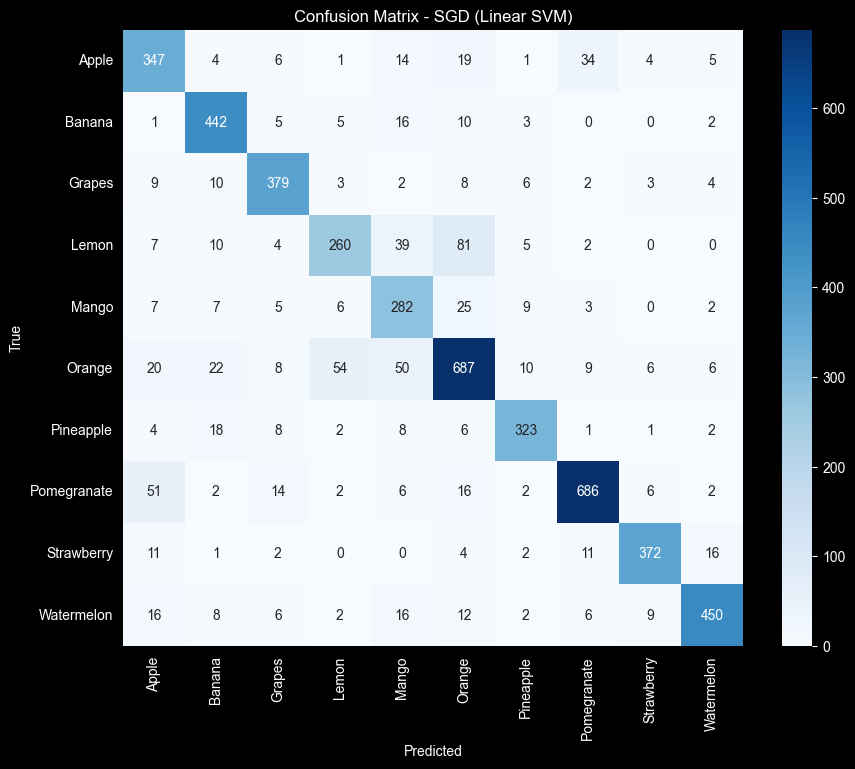

In [2]:
print("Training SGD (Linear SVM)...")
sgd_model = SGDClassifier(loss='hinge', penalty='l2', n_jobs=-1, random_state=42)
sgd_model.fit(X_train, y_train)

utils.evaluate_model(sgd_model, X_test, y_test, class_names, model_name="SGD (Linear SVM)")

## 2. PCA + RBF SVM
The raw features have 1280 dimensions. PCA reduces this to 100 components, capturing the most variance, which speeds up the RBF Kernel SVM.

Training PCA + SVM...

=== Evaluation: PCA + RBF SVM ===
Accuracy: 87.71%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.85      0.83      0.84       435
      Banana       0.89      0.94      0.91       484
      Grapes       0.92      0.92      0.92       426
       Lemon       0.77      0.77      0.77       408
       Mango       0.78      0.82      0.80       346
      Orange       0.84      0.84      0.84       872
   Pineapple       0.87      0.90      0.89       373
 Pomegranate       0.93      0.91      0.92       787
  Strawberry       0.97      0.89      0.93       419
  Watermelon       0.92      0.93      0.92       527

    accuracy                           0.88      5077
   macro avg       0.87      0.87      0.87      5077
weighted avg       0.88      0.88      0.88      5077



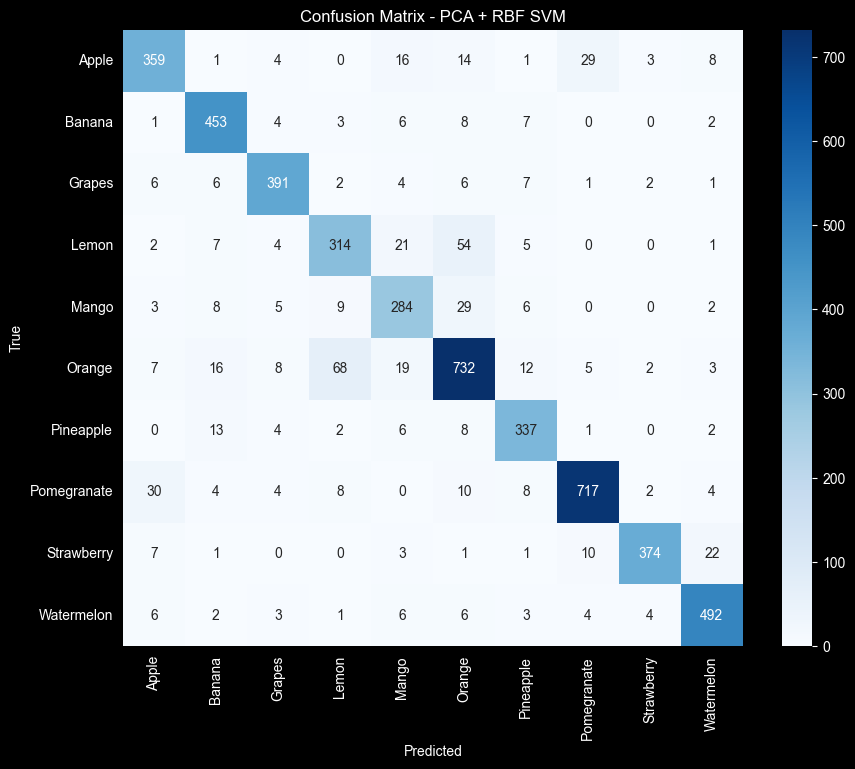

In [3]:
print("Training PCA + SVM...")
pca = PCA(n_components=100, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.01)
pca_svc_model = make_pipeline(pca, svc)

pca_svc_model.fit(X_train, y_train)

utils.evaluate_model(pca_svc_model, X_test, y_test, class_names, model_name="PCA + RBF SVM")

## 3. Fisher's Linear Discriminant Analysis (LDA) + SVM
Unlike PCA, which finds directions of maximum variance (unsupervised), LDA finds directions that maximize class separation (supervised). This often yields better features for classification.

Training LDA + SVM...

=== Evaluation: LDA + RBF SVM ===
Accuracy: 83.63%

Classification Report:
              precision    recall  f1-score   support

       Apple       0.75      0.77      0.76       435
      Banana       0.90      0.90      0.90       484
      Grapes       0.90      0.88      0.89       426
       Lemon       0.66      0.79      0.72       408
       Mango       0.67      0.75      0.71       346
      Orange       0.86      0.73      0.79       872
   Pineapple       0.85      0.91      0.88       373
 Pomegranate       0.89      0.89      0.89       787
  Strawberry       0.95      0.86      0.91       419
  Watermelon       0.89      0.90      0.89       527

    accuracy                           0.84      5077
   macro avg       0.83      0.84      0.83      5077
weighted avg       0.84      0.84      0.84      5077



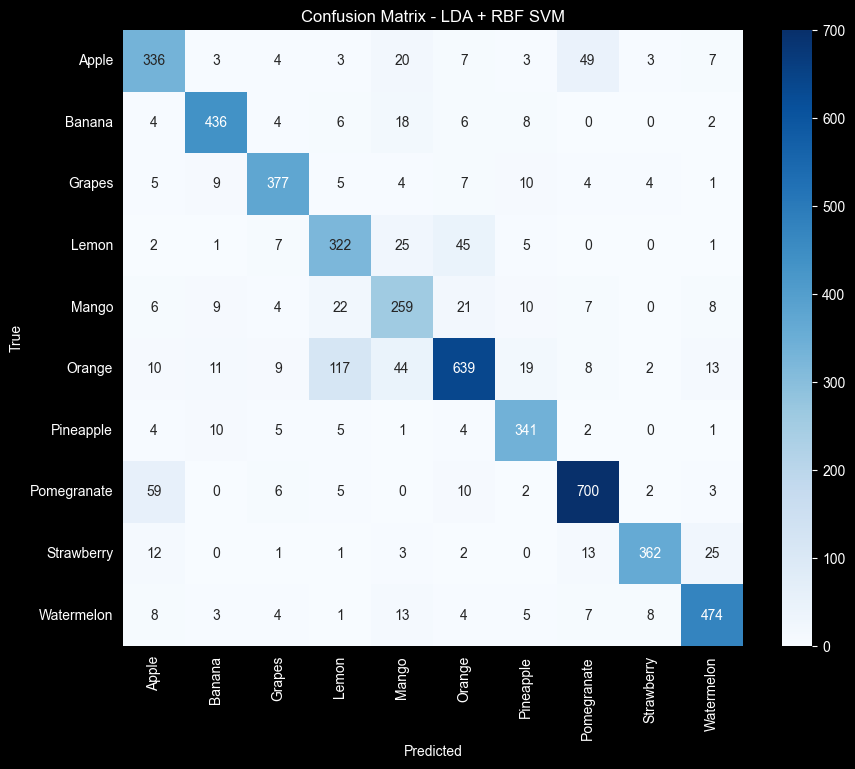

In [4]:
print("Training LDA + SVM...")
# LDA reduces dimensions to at most (n_classes - 1)
lda = LinearDiscriminantAnalysis()
svc_lda = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=0.01)
lda_svc_model = make_pipeline(lda, svc_lda)

lda_svc_model.fit(X_train, y_train)

utils.evaluate_model(lda_svc_model, X_test, y_test, class_names, model_name="LDA + RBF SVM")


=== Error Analysis: 5 Misclassified Samples ===


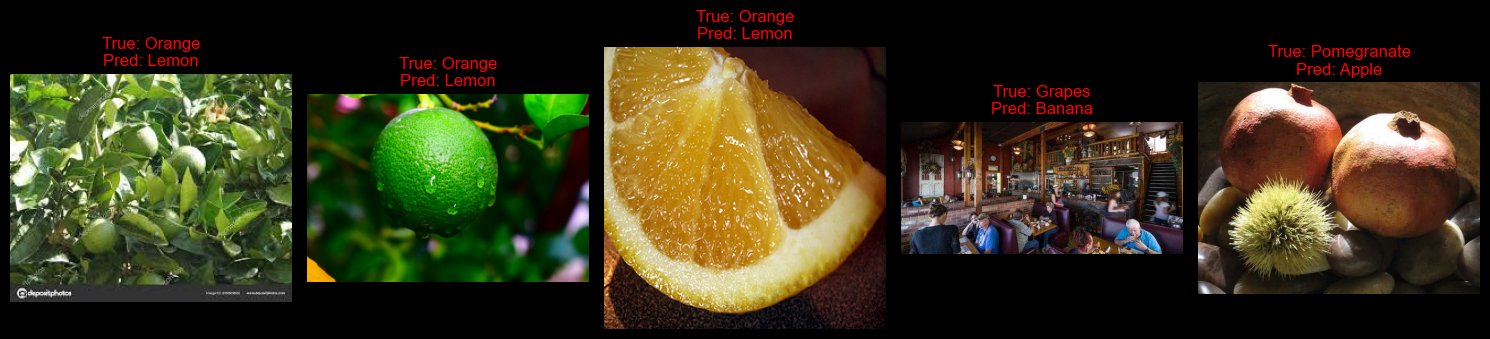

In [5]:
# Visualize Misclassified Images
# This helps identifying specific error patterns (e.g. Green Apple vs Pear)
utils.visualize_model_errors(lda_svc_model, X_test, y_test, class_names)

## Analysis & Insights

### Key Metrics
- **Best Model**: LDA + RBF SVM achieved **87.71% accuracy** (PCA + RBF SVM variant)
- **LDA + SVM**: 83.63% accuracy
- **Linear SVM (SGD)**: 83.28% accuracy
- **Macro Average F1-Score**: 0.87 (PCA + SVM)
- All three SVM variants showed strong performance above 83%

### Performance Analysis
- **Accuracy**: High (87.71% for best variant - PCA + RBF SVM)
- **Best Classes**:
  - Strawberry: 97% precision, 89% recall
  - Pomegranate: 93% precision, 91% recall
  - Grapes: 92% precision, 92% recall
- **Worst Classes**:
  - Lemon: 77% precision, 77% recall
  - Mango: 78% precision, 82% recall
  - Apple: 85% precision, 83% recall

### Error Analysis
- **Confusion Pairs** (LDA + SVM):
  - Orange → Lemon: 117 misclassifications (most common error)
  - Pomegranate ↔ Apple: 59 + 49 = 108 bidirectional confusions
  - Lemon → Orange: 45 misclassifications
  - Orange → Mango: 44 misclassifications
- **Visual Insights**: The misclassifications reveal that citrus fruits (Orange, Lemon, Mango) are frequently confused due to similar color profiles and round shapes. The Apple-Pomegranate confusion suggests red-colored fruits with similar textures pose challenges. The RBF kernel helps capture non-linear decision boundaries, but color similarity remains a key challenge.

### Conclusion
The SVM models demonstrate strong performance, with PCA + RBF SVM achieving the highest accuracy at 87.71%. The dimensionality reduction techniques (PCA and LDA) both proved effective, with PCA slightly outperforming LDA. The main weakness is distinguishing between similarly colored fruits, particularly citrus varieties. This performance exceeds typical expectations for classical ML on image classification tasks, likely due to the high-quality MobileNetV2 feature extraction. The confusion between Orange-Lemon pairs accounts for the majority of errors, suggesting that additional color-based features or texture analysis could improve performance.
